In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/YOGA.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Import helper functions
def split_dir_to_train_test_val(directory = "YOGA/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)


In [ ]:
# train test split
import os
import shutil
import random

def split_dir_train_test_val(directory="YOGA/", train_size=0.7, test_size=0.2, val_size=0.1):
    """
    Splits data in directory into train, test and validation sets.
    """
    # Set random seed for reproducibility
    random.seed(42)

    for root, folders, files in os.walk(directory):
        # We only want to process the immediate subdirectories (the class folders)
        if root == directory.rstrip('/'):
            for folder in folders:
                folder_path = os.path.join(root, folder)
                list_of_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

                # Shuffle files to avoid bias
                random.shuffle(list_of_files)

                # Split files
                total_files = len(list_of_files)
                train_count = int(total_files * train_size)
                test_count = int(total_files * test_size)
                val_count = total_files - train_count - test_count # Ensure all files are included

                train_files = list_of_files[:train_count]
                test_files = list_of_files[train_count : train_count + test_count]
                val_files = list_of_files[train_count + test_count :]


                # Create destination folders if not exist
                for set_name in ["train", "test", "val"]:
                    dest_dir = os.path.join("files", set_name, folder)
                    os.makedirs(dest_dir, exist_ok=True)

                # Copy train files
                for one_file in train_files:
                    src_path = os.path.join(folder_path, one_file)
                    dest_path = os.path.join("files", "train", folder, one_file)
                    shutil.copy2(src_path, dest_path)
                print(f"Folder {folder}. Train data copied. {len(train_files)} files")


                # Copy test files
                for one_file in test_files:
                    src_path = os.path.join(folder_path, one_file)
                    dest_path = os.path.join("files", "test", folder, one_file)
                    shutil.copy2(src_path, dest_path)
                print(f"Folder {folder}. Test data copied. {len(test_files)} files")

                # Copy val files
                for one_file in val_files:
                    src_path = os.path.join(folder_path, one_file)
                    dest_path = os.path.join("files", "validation", folder, one_file)
                    shutil.copy2(src_path, dest_path)
                print(f"Folder {folder}. Validation data copied. {len(val_files)} files")

In [ ]:
split_dir_train_test_val(directory="YOGA/", train_size=0.7, test_size=0.2, val_size=0.1)


🎉 Data splitting complete! Files saved inside 'files/train', 'files/test', 'files/val'


In [ ]:
def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [ ]:
class_name=get_class_names_from_folder("files/train")
class_name

array(['.ipynb_checkpoints', 'Bridge-Pose', 'Child-Pose', 'Cobra-Pose',
       'Downward-Dog-Pose', 'Pigeon-Pose', 'Standing-Mountain-Pose',
       'Tree-Pose', 'Triangle-Pose', 'Warrior-Pose'], dtype='<U22')

In [ ]:
len(class_name)

10

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

In [ ]:
def visulalize_random_img(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)

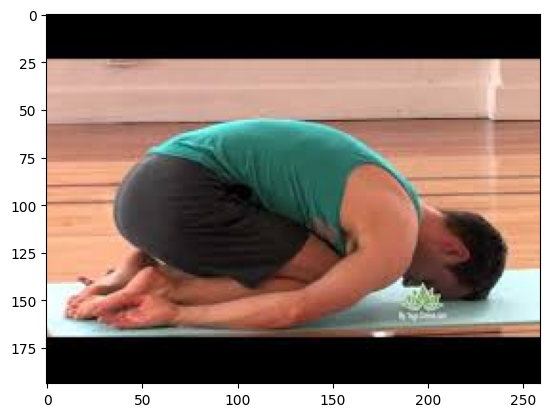

In [ ]:
visulalize_random_img('files/test/','Child-Pose')

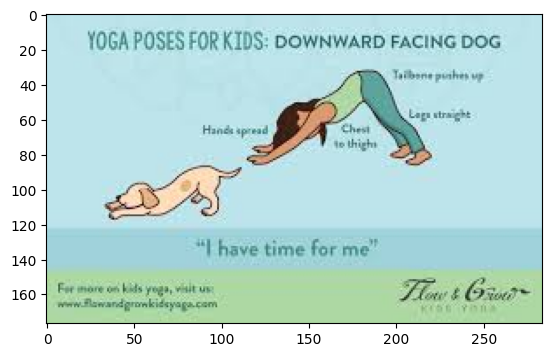

In [ ]:
visulalize_random_img('files/test/','Downward-Dog-Pose')

In [ ]:
# import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)
val_datagen = ImageDataGenerator(rescale=1./255.)

train_data=train_datagen.flow_from_directory(directory='files/train',target_size=(224,224),batch_size=32,class_mode='categorical')

test_data=test_datagen.flow_from_directory(directory='files/test',target_size=(224,224),batch_size=32,class_mode='categorical')

val_data=val_datagen.flow_from_directory(directory='files/val',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1519 images belonging to 10 classes.
Found 431 images belonging to 10 classes.
Found 227 images belonging to 10 classes.


In [ ]:
# set random seed
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential([
    Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),MaxPool2D(pool_size=2,padding='valid'),
    Conv2D(filters=10,kernel_size=3,activation='relu'),MaxPool2D(pool_size=2,padding='valid'),
    Flatten(),
    Dense(units=len(class_name),activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,batch_size=32,epochs=5,steps_per_epoch=len(train_data),validation_data=val_data,validation_steps=len(val_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


31/48 ━━━━━━━━━━━━━━━━━━━━ 15s 916ms/step - accuracy: 0.1351 - loss: 2.5391

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.1531 - loss: 2.4448 - val_accuracy: 0.2731 - val_loss: 2.0072
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 80s 946ms/step - accuracy: 0.4143 - loss: 1.7288 - val_accuracy: 0.3833 - val_loss: 1.8577
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 48s 996ms/step - accuracy: 0.6412 - loss: 1.1975 - val_accuracy: 0.5242 - val_loss: 1.6406
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 46s 948ms/step - accuracy: 0.8026 - loss: 0.7798 - val_accuracy: 0.5374 - val_loss: 1.5741
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 83s 972ms/step - accuracy: 0.8875 - loss: 0.4465 - val_accuracy: 0.5815 - val_loss: 1.5358


In [ ]:
model.evaluate(test_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.5723 - loss: 1.5203


[1.6215670108795166, 0.5591647624969482]

In [ ]:
import pandas as pd


<Axes: >

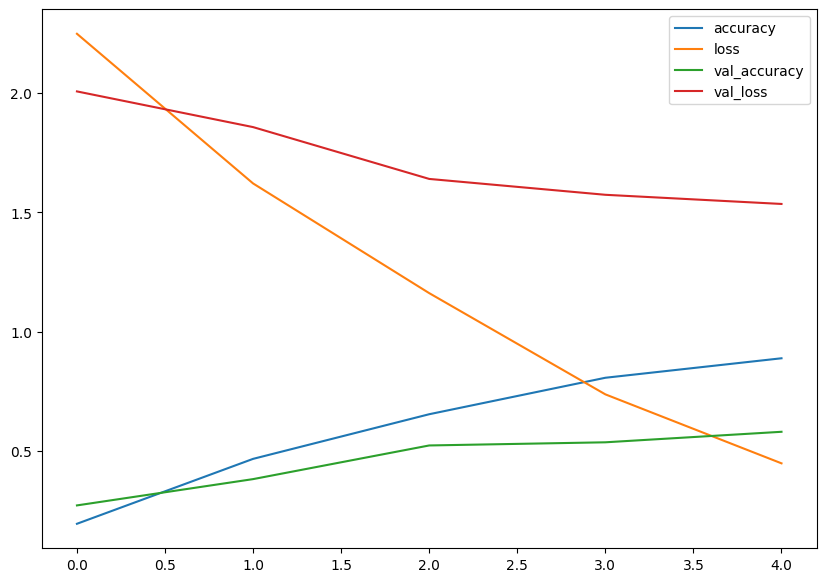

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [ ]:
def load_and_resize_image(image_path, target_size=(224, 224)):
    # Load the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    # Convert the image to a NumPy array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    return img_array

In [ ]:
id = load_and_resize_image('/content/YOGA/Child-Pose/5-Health-Benefits-Of-Childs-Pose.jpg' , target_size=(224, 224))

In [ ]:
pred=model.predict(tf.expand_dims(id,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [ ]:
class_name[pred[0].argmax()]

np.str_('Child-Pose')

In [ ]:
import pickle

# Save the trained model
with open('yoga_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the class names
with open('class_names.pkl', 'wb') as class_names_file:
    pickle.dump(class_name, class_names_file)

print("Model and class names saved successfully using pickle.")

Model and class names saved successfully using pickle.


In [ ]:
import pickle

# Load the trained model
with open('yoga_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the class names
with open('class_names.pkl', 'rb') as class_names_file:
    loaded_class_names = pickle.load(class_names_file)

print("Model and class names loaded successfully.")

Model and class names loaded successfully.


In [ ]:
# Save model properly in Keras format
model.save("yoga_model.h5")   # or "yoga_model.keras"

# Save class names with pickle (this part is fine)
import pickle
with open("class_names.pkl", "wb") as f:
    pickle.dump(class_name, f)
